### Imports

In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine


### Read & clean the data

In [2]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

df['Wine_Class'] = wine.target
df['Wine_Class_Name'] = df['Wine_Class'].map({0: 'Class_0', 1: 'Class_1', 2: 'Class_2'})

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine_Class,Wine_Class_Name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,Class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,Class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,Class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,Class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,Class_0


### Feature selection

In [3]:
df_x = df.drop(['Wine_Class', 'Wine_Class_Name'], axis=1)
df_y = df['Wine_Class']

### Normalization


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_x)

### Plotting the dendrogram

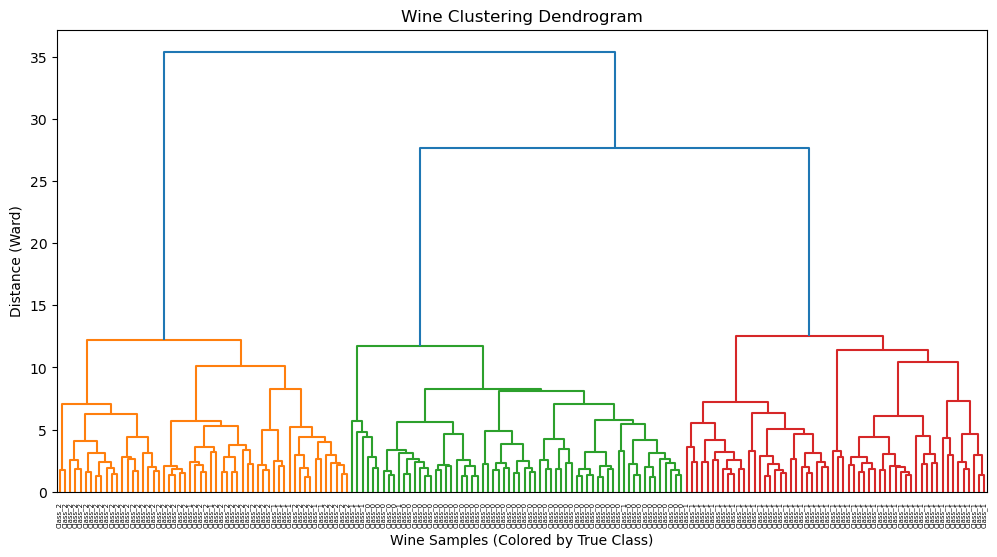

In [5]:
# compute linkage matrix
Z = linkage(df_x_scaled, method='ward')

# plot dendrogram with true class labels
plt.figure(figsize=(12, 6))

dendrogram(Z, labels=df['Wine_Class_Name'].values, leaf_rotation=90)
plt.title("Wine Clustering Dendrogram")
plt.xlabel("Wine Samples (Colored by True Class)")
plt.ylabel("Distance (Ward)")

plt.show()

### Hierarchial Agglomerative Clustering

In [6]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

df['Cluster'] = cluster.fit_predict(df_x_scaled)

df[['Wine_Class_Name', 'Cluster']].head()

,Wine_Class_Name,Cluster
0,Class_0,2
1,Class_0,2
2,Class_0,2
3,Class_0,2
4,Class_0,2


### Plot clusters

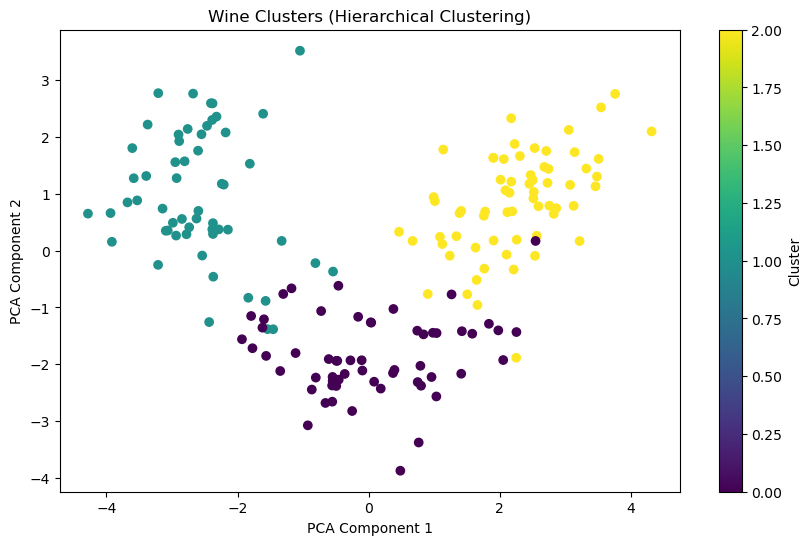

In [7]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_x_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis')
plt.title("Wine Clusters (Hierarchical Clustering)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [8]:
wine_counts = df['Cluster'].value_counts().sort_index()
print("\n Wine Count per Cluster:")
print(wine_counts)


 Wine Count per Cluster:
Cluster
0    58
1    56
2    64
Name: count, dtype: int64


### Evaluation

In [9]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Compare with true labels
ari = adjusted_rand_score(df_y, df['Cluster'])
print(f"Adjusted Rand Index (ARI): {ari:.2f}") 

# Check cluster separation
silhouette = silhouette_score(df_x_scaled, df['Cluster'])
print(f"Silhouette Score: {silhouette:.2f}")

Adjusted Rand Index (ARI): 0.79
Silhouette Score: 0.28
